## 회귀분석

In [1]:
import pandas as pd

In [2]:
anal_df = pd.read_csv("C:/data/now_used/final_with_dummies.csv")
anal_df.head(5)

,건축물대장코드,구시군,읍면동,번,지,상가유형,지하총층,지상총층,대지면적m2,건축면적m2,...,건물연차,총세대수,평균평당가,type_근린상가,type_기타상가,type_단지내상가,type_복합상가,주차가능여부,승강기여부,상가유형번호
0,11110-10014,종로구,동숭동,1,114,근린상가,1,5,502.20,250.02,...,38,436,2145.0,1,0,0,0,0,1,1
1,11110-100180009,종로구,동숭동,1,67,기타상가,4,5,2243.00,1253.20,...,12,436,2145.0,0,1,0,0,1,1,2
2,11110-100195520,종로구,동숭동,1,94,기타상가,5,6,760.04,378.83,...,7,436,2145.0,0,1,0,0,1,1,2
3,11110-11314,종로구,명륜4가,198,2,근린상가,1,4,0.00,0.00,...,31,436,2145.0,1,0,0,0,0,0,1
4,11110-12944,종로구,명륜2가,181,0,근린상가,1,3,0.00,0.00,...,32,436,2145.0,1,0,0,0,0,0,1


In [3]:
anal_df.columns

Index(['건축물대장코드', '구시군', '읍면동', '번', '지', '상가유형', '지하총층', '지상총층', '대지면적m2',
       '건축면적m2', '연면적m2', '높이m', '주차대수', '승강기수', 'usage_area', 'cont_area',
       'rent_ua', 'rent_ca', '지하철거리m', '승객수점수', '건물별전기사용량', '본번별평균사용량',
       '횡단보도거리m', '건물연차', '총세대수', '평균평당가', 'type_근린상가', 'type_기타상가',
       'type_단지내상가', 'type_복합상가', '주차가능여부', '승강기여부', '상가유형번호'],
      dtype='object')

In [4]:
anal_df = anal_df[['건축물대장코드', '구시군', '읍면동', '번', '지', '상가유형', '지하총층', '지상총층',
       '연면적m2', '주차대수', '승강기수', 'usage_area', 'cont_area',
       'rent_ua', 'rent_ca', '지하철거리m', '승객수점수', '건물별전기사용량', '본번별평균사용량',
       '횡단보도거리m', '건물연차', '총세대수', '평균평당가', 'type_근린상가', 'type_기타상가',
       'type_단지내상가', 'type_복합상가', '주차가능여부', '승강기여부', '상가유형번호']]

In [5]:
# 회귀분석

from statsmodels.formula.api import ols

# 모형 만들기 (전체 변수를 넣어보자)

model1 = ols('rent_ua ~ usage_area + cont_area + 지하총층 + 지상총층 + 연면적m2 + 주차대수 + 승강기수 + 지하철거리m + 승객수점수 + 횡단보도거리m + 건물별전기사용량 + 본번별평균사용량 + 건물연차 + 총세대수 + 평균평당가', anal_df)

# 모형 적합

res = model1.fit()

# 분석 결과 확인

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                rent_ua   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     118.6
Date:                Wed, 14 Oct 2020   Prob (F-statistic):               0.00
Time:                        09:26:26   Log-Likelihood:                -24390.
No. Observations:                9470   AIC:                         4.881e+04
Df Residuals:                    9454   BIC:                         4.893e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3953      0.188     12.743      0.000       2.027       2.764
usage_area    -0.0002   5.44e-05     -3.678      0.000      -0.000   -9.35e-05
cont_area    4.69e-07   5.16e-06      0.091      0.928   -9.65e-06    1.06e-05
지하총층           0.1691      0.054      3.159      0.002       0.064       0.274
지상총층           0.0985      0.020      4.903      0.000       0.059       0.138
연면적m2      -7.213e-05   1.89e-05     -3.818      0.000      -0.000   -3.51e-05
주차대수          -0.0073      0.002     -4.208      0.000      -0.011      -0.004
승강기수           0.4209      0.059      7.080      0.000       0.304       0.537
지하철거리m        -0.1032      0.012     -8.842      0.000      -0.126      -0.080
승객수점수       1.086e-05   5.19e-07     20.945      0.000    9.85e-06    1.19e-05
횡단보도거리m       -0.0055      0.001     -7.057      0.000      -0.007      -0.004
건물별전기사용량     8.33e-06   1.23e-06      6.783      0.000    5.92e-06    1.07e-05
본번별평균사용량    3.571e-06   9.01e-07      3.965      0.000    1.81e-06    5.34e-06
건물연차           0.0270      0.003      8.555      0.000       0.021       0.033
총세대수          -0.0004   6.76e-05     -5.728      0.000      -0.001      -0.000
평균평당가          0.0005      3e-05     15.395      0.000       0.000       0.001
==============================================================================
Omnibus:                     9430.030   Durbin-Watson:                   1.581
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1086303.641
Skew:                           4.617   Prob(JB):                         0.00
Kurtosis:                      54.651   Cond. No.                     5.97e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

{'whiskers': [<matplotlib.lines.Line2D at 0x1b65180f790>,
 'caps': [<matplotlib.lines.Line2D at 0x1b65180fe50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b65180f430>],
 'medians': [<matplotlib.lines.Line2D at 0x1b651820550>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b651820850>],
 'means': []}

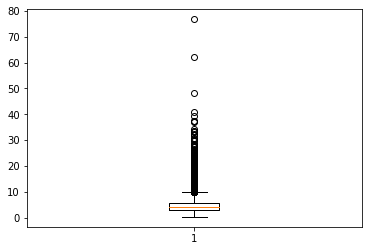

In [7]:
# rent_ua 이상치 파악

min = np.percentile(anal_df['rent_ua'],0)
q1 = np.percentile(anal_df['rent_ua'],25)
q2 = np.percentile(anal_df['rent_ua'],50)
q3 = np.percentile(anal_df['rent_ua'],75)
max = np.percentile(anal_df['rent_ua'],100)

IQR = q3 - q1
iqr = q3 - q1
lf = q1 - 1.5 * iqr
uf = q3 + 1.5 * iqr


plt.boxplot(anal_df['rent_ua'])

Text(0.85, 10.013351134846463, '10.013351134846463')

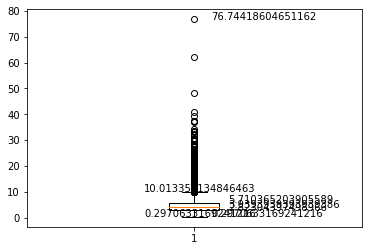

In [8]:

anal_df['rent_ua'][anal_df['rent_ua'] < lf]
anal_df['rent_ua'][anal_df['rent_ua'] > lf].min()

anal_df['rent_ua'][anal_df['rent_ua'] > uf]
anal_df['rent_ua'][anal_df['rent_ua'] < uf].max()

plt.boxplot(anal_df['rent_ua'])
plt.text(1.05, min, min) 
plt.text(1.1, q1, q1)
plt.text(1.1, q2, q2)
plt.text(1.1, q3, q3)
plt.text(1.05, max, max)

plt.text(0.85, anal_df['rent_ua'][anal_df['rent_ua'] > lf].min(), anal_df['rent_ua'][anal_df['rent_ua'] > lf].min())
plt.text(0.85, anal_df['rent_ua'][anal_df['rent_ua'] < uf].max(), anal_df['rent_ua'][anal_df['rent_ua'] < uf].max())


## rent_ua 컬럼 이상치 제거

In [10]:
# rent_ua 이상치 제거
anal_df2 = anal_df.copy()

q1 = anal_df2['rent_ua'].quantile(0.25)
q3 = anal_df2['rent_ua'].quantile(0.75)
iqt = 1.5 * (q3-q1)

In [11]:
anal_df2.columns

Index(['건축물대장코드', '구시군', '읍면동', '번', '지', '상가유형', '지하총층', '지상총층', '연면적m2',
       '주차대수', '승강기수', 'usage_area', 'cont_area', 'rent_ua', 'rent_ca',
       '지하철거리m', '승객수점수', '건물별전기사용량', '본번별평균사용량', '횡단보도거리m', '건물연차', '총세대수',
       '평균평당가', 'type_근린상가', 'type_기타상가', 'type_단지내상가', 'type_복합상가', '주차가능여부',
       '승강기여부', '상가유형번호'],
      dtype='object')

In [12]:
z = anal_df2[['지하총층', '지상총층', '주차대수', '승강기수', 'rent_ua', 'type_근린상가',
       'type_기타상가', 'type_단지내상가', 'type_복합상가', '주차가능여부', '승강기여부', '상가유형번호',
       '연면적m2', 'usage_area', 'cont_area', '지하철거리m',
       '승객수점수', '건물별전기사용량', '본번별평균사용량', '횡단보도거리m', '건물연차', '총세대수', '평균평당가']]

In [13]:
z['rent_ua'][(z['rent_ua'] > (q3 + iqt)) | (z['rent_ua'] < (q1 - iqt))] = None
z

<ipython-input-13-5b6fb51fab7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['rent_ua'][(z['rent_ua'] > (q3 + iqt)) | (z['rent_ua'] < (q1 - iqt))] = None
C:\python\lib\site-packages\pandas\core\generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,지하총층,지상총층,주차대수,승강기수,rent_ua,type_근린상가,type_기타상가,type_단지내상가,type_복합상가,주차가능여부,...,usage_area,cont_area,지하철거리m,승객수점수,건물별전기사용량,본번별평균사용량,횡단보도거리m,건물연차,총세대수,평균평당가
0,1,5,0,1,NaN,1,0,0,0,0,...,15.50,15.50,1.082077,71533.898,11937,15813.56,45.543627,38,436,2145.00
1,4,5,7,4,NaN,0,1,0,0,1,...,103.00,143.92,1.373136,117064.164,57888,15813.56,96.055953,12,436,2145.00
2,5,6,4,2,4.323740,0,1,0,0,1,...,370.05,370.05,2.095677,41692.829,25836,15813.56,168.113254,7,436,2145.00
3,1,4,0,0,4.792551,1,0,0,0,0,...,73.03,73.03,3.944218,24836.371,329,2033.50,70.496126,31,436,2145.00
4,1,3,0,0,NaN,1,0,0,0,0,...,79.38,79.38,2.352421,73908.132,8157,8157.00,57.771202,32,436,2145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9465,1,4,8,0,2.143385,1,0,0,0,1,...,135.30,150.00,6.338093,16626.646,3433,3433.00,30.926687,35,70,1410.80
9466,1,3,2,0,0.874221,1,0,0,0,1,...,91.51,100.51,6.663946,11408.498,744,668.67,173.587834,30,126,1435.67
9467,0,2,9,0,6.050130,1,0,0,0,1,...,231.40,330.58,3.604660,16101.477,8198,5994.50,35.182885,14,12,1891.00
9468,1,2,0,0,4.112554,1,0,0,0,0,...,23.10,26.40,3.943528,63850.478,5625,8424.50,102.889515,37,62,2134.00


In [14]:
z.isnull().sum()

지하총층            0
지상총층            0
주차대수            0
승강기수            0
rent_ua       561
type_근린상가       0
type_기타상가       0
type_단지내상가      0
type_복합상가       0
주차가능여부          0
승강기여부           0
상가유형번호          0
연면적m2           0
usage_area      0
cont_area       0
지하철거리m          0
승객수점수           0
건물별전기사용량        0
본번별평균사용량        0
횡단보도거리m         0
건물연차            0
총세대수            0
평균평당가           0
dtype: int64

In [15]:
z = z.dropna(axis = 0, how = 'any')
z.isnull().sum()

지하총층          0
지상총층          0
주차대수          0
승강기수          0
rent_ua       0
type_근린상가     0
type_기타상가     0
type_단지내상가    0
type_복합상가     0
주차가능여부        0
승강기여부         0
상가유형번호        0
연면적m2         0
usage_area    0
cont_area     0
지하철거리m        0
승객수점수         0
건물별전기사용량      0
본번별평균사용량      0
횡단보도거리m       0
건물연차          0
총세대수          0
평균평당가         0
dtype: int64

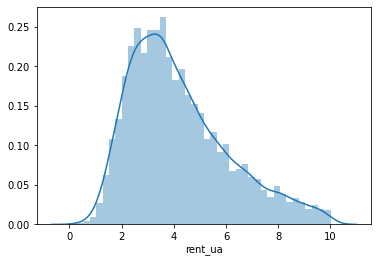

In [16]:
sns.distplot(z.iloc[:,4])
plt.show()

In [17]:
import scipy as sp
import scipy.stats as stats

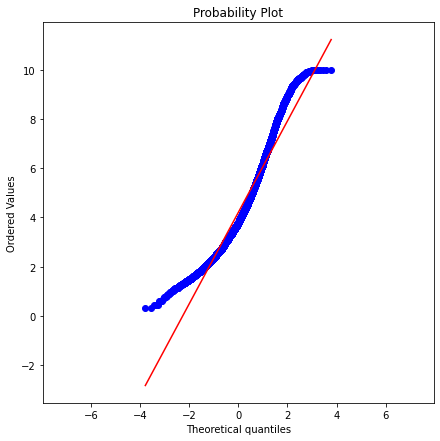

In [18]:
x = z.iloc[:,4]
plt.figure(figsize = (7,7))
sp.stats.probplot(x, plot = plt)
plt.axis('equal')
plt.show()

In [19]:
# 이상값 다시 제거

q1 = z["rent_ua"].quantile(0.25)
q3 = z["rent_ua"].quantile(0.75)
iqt = 1.5 * (q3 - q1)
z1 = z.copy()
z1["rent_ua"][(z1["rent_ua"] > (q3 + iqt)) | (z1["rent_ua"] < (q1 - iqt))] = None
z1

<ipython-input-19-02376eca61ea>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z1["rent_ua"][(z1["rent_ua"] > (q3 + iqt)) | (z1["rent_ua"] < (q1 - iqt))] = None


,지하총층,지상총층,주차대수,승강기수,rent_ua,type_근린상가,type_기타상가,type_단지내상가,type_복합상가,주차가능여부,...,usage_area,cont_area,지하철거리m,승객수점수,건물별전기사용량,본번별평균사용량,횡단보도거리m,건물연차,총세대수,평균평당가
2,5,6,4,2,4.323740,0,1,0,0,1,...,370.05,370.05,2.095677,41692.829,25836,15813.56,168.113254,7,436,2145.00
3,1,4,0,0,4.792551,1,0,0,0,0,...,73.03,73.03,3.944218,24836.371,329,2033.50,70.496126,31,436,2145.00
5,2,6,4,1,2.693714,0,1,0,0,1,...,604.37,695.77,1.545939,53349.692,23382,15813.56,100.760691,24,436,2145.00
6,1,6,0,0,3.608247,1,0,0,0,0,...,174.60,174.60,1.513924,108422.444,3603,15813.56,118.510267,29,436,2145.00
7,3,5,1,0,NaN,1,0,0,0,1,...,100.00,100.00,2.068502,82818.824,28109,9079.33,72.326907,24,436,2145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9465,1,4,8,0,2.143385,1,0,0,0,1,...,135.30,150.00,6.338093,16626.646,3433,3433.00,30.926687,35,70,1410.80
9466,1,3,2,0,0.874221,1,0,0,0,1,...,91.51,100.51,6.663946,11408.498,744,668.67,173.587834,30,126,1435.67
9467,0,2,9,0,6.050130,1,0,0,0,1,...,231.40,330.58,3.604660,16101.477,8198,5994.50,35.182885,14,12,1891.00
9468,1,2,0,0,4.112554,1,0,0,0,0,...,23.10,26.40,3.943528,63850.478,5625,8424.50,102.889515,37,62,2134.00


In [20]:
z1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8909 entries, 2 to 9469
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지하총층        8909 non-null   int64  
 1   지상총층        8909 non-null   int64  
 2   주차대수        8909 non-null   int64  
 3   승강기수        8909 non-null   int64  
 4   rent_ua     8748 non-null   float64
 5   type_근린상가   8909 non-null   int64  
 6   type_기타상가   8909 non-null   int64  
 7   type_단지내상가  8909 non-null   int64  
 8   type_복합상가   8909 non-null   int64  
 9   주차가능여부      8909 non-null   int64  
 10  승강기여부       8909 non-null   int64  
 11  상가유형번호      8909 non-null   int64  
 12  연면적m2       8909 non-null   float64
 13  usage_area  8909 non-null   float64
 14  cont_area   8909 non-null   float64
 15  지하철거리m      8909 non-null   float64
 16  승객수점수       8909 non-null   float64
 17  건물별전기사용량    8909 non-null   int64  
 18  본번별평균사용량    8909 non-null   float64
 19  횡단보도거리m     8909 non-null  

In [21]:
z1 = z1.dropna(axis = 0, how = 'any')
z1

,지하총층,지상총층,주차대수,승강기수,rent_ua,type_근린상가,type_기타상가,type_단지내상가,type_복합상가,주차가능여부,...,usage_area,cont_area,지하철거리m,승객수점수,건물별전기사용량,본번별평균사용량,횡단보도거리m,건물연차,총세대수,평균평당가
2,5,6,4,2,4.323740,0,1,0,0,1,...,370.05,370.05,2.095677,41692.829,25836,15813.56,168.113254,7,436,2145.00
3,1,4,0,0,4.792551,1,0,0,0,0,...,73.03,73.03,3.944218,24836.371,329,2033.50,70.496126,31,436,2145.00
5,2,6,4,1,2.693714,0,1,0,0,1,...,604.37,695.77,1.545939,53349.692,23382,15813.56,100.760691,24,436,2145.00
6,1,6,0,0,3.608247,1,0,0,0,0,...,174.60,174.60,1.513924,108422.444,3603,15813.56,118.510267,29,436,2145.00
8,1,3,3,0,7.238095,1,0,0,0,1,...,26.25,26.25,5.148030,48431.394,4521,4521.00,24.350156,23,436,2145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9465,1,4,8,0,2.143385,1,0,0,0,1,...,135.30,150.00,6.338093,16626.646,3433,3433.00,30.926687,35,70,1410.80
9466,1,3,2,0,0.874221,1,0,0,0,1,...,91.51,100.51,6.663946,11408.498,744,668.67,173.587834,30,126,1435.67
9467,0,2,9,0,6.050130,1,0,0,0,1,...,231.40,330.58,3.604660,16101.477,8198,5994.50,35.182885,14,12,1891.00
9468,1,2,0,0,4.112554,1,0,0,0,0,...,23.10,26.40,3.943528,63850.478,5625,8424.50,102.889515,37,62,2134.00


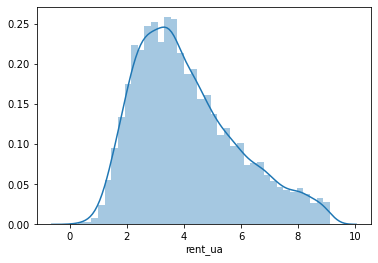

In [22]:
sns.distplot(z1.iloc[:,4])
plt.show()

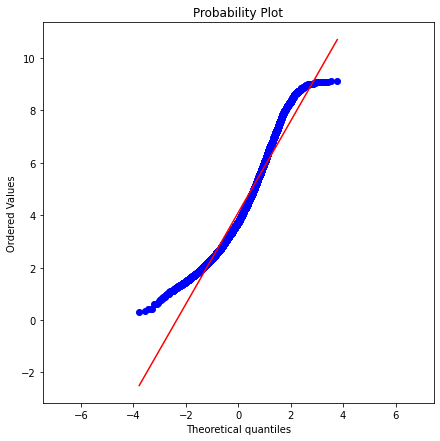

In [23]:
x = z1.iloc[:,4]
plt.figure(figsize = (7,7))
sp.stats.probplot(x, plot = plt)
plt.axis('equal')
plt.show()

## 상관계수 히트맵 그려보기

In [24]:
# 상관계수 확인

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['font.family'] = 'NanumGothic'

# 스피어만 상관계수

corr_ua_s = z1.corr(method = 'spearman')
corr_ua_s

,지하총층,지상총층,주차대수,승강기수,rent_ua,type_근린상가,type_기타상가,type_단지내상가,type_복합상가,주차가능여부,...,usage_area,cont_area,지하철거리m,승객수점수,건물별전기사용량,본번별평균사용량,횡단보도거리m,건물연차,총세대수,평균평당가
지하총층,1.000000,0.477506,0.312968,0.372693,0.112993,-0.413097,0.338887,0.078717,0.232521,0.216644,...,0.177988,0.217317,-0.004252,0.148448,0.420374,0.354347,0.004864,-0.240244,-0.003203,0.113601
지상총층,0.477506,1.000000,0.561379,0.620151,0.150928,-0.405257,0.348230,0.067245,0.191943,0.489841,...,0.254053,0.287735,-0.015928,0.168716,0.446334,0.337899,0.040291,-0.611561,-0.038850,0.154310
주차대수,0.312968,0.561379,1.000000,0.454851,0.084013,-0.243730,0.178836,0.055666,0.187080,0.890364,...,0.209069,0.237084,0.042995,0.063529,0.359420,0.281663,0.083648,-0.534616,-0.045612,0.131785
승강기수,0.372693,0.620151,0.454851,1.000000,0.180233,-0.402270,0.323282,0.082824,0.241146,0.343690,...,0.243435,0.274720,-0.040995,0.171874,0.406460,0.330320,0.034146,-0.563018,-0.033077,0.099319
rent_ua,0.112993,0.150928,0.084013,0.180233,1.000000,-0.141449,0.117549,0.039651,0.071212,0.043689,...,0.037611,0.077556,-0.231996,0.348519,0.303221,0.346366,-0.087330,-0.057573,-0.036370,0.238933
type_근린상가,-0.413097,-0.405257,-0.243730,-0.402270,-0.141449,1.000000,-0.919538,-0.121019,-0.337948,-0.142776,...,-0.155317,-0.197181,0.062921,-0.172356,-0.366415,-0.338663,0.008431,0.208380,0.033431,-0.053383
type_기타상가,0.338887,0.348230,0.178836,0.323282,0.117549,-0.919538,1.000000,-0.012180,-0.034012,0.114290,...,0.148032,0.180438,-0.062830,0.147389,0.313004,0.287106,-0.022400,-0.159875,-0.050195,0.063706
type_단지내상가,0.078717,0.067245,0.055666,0.082824,0.039651,-0.121019,-0.012180,1.000000,-0.004476,0.028397,...,0.007164,0.009841,-0.009031,0.021407,0.065191,0.054898,0.005168,-0.046922,0.001267,-0.008738
type_복합상가,0.232521,0.191943,0.187080,0.241146,0.071212,-0.337948,-0.034012,-0.004476,1.000000,0.087087,...,0.043557,0.073925,-0.008215,0.086035,0.176621,0.170710,0.031846,-0.142595,0.035834,-0.013321
주차가능여부,0.216644,0.489841,0.890364,0.343690,0.043689,-0.142776,0.114290,0.028397,0.087087,1.000000,...,0.174170,0.191249,0.061175,0.033012,0.223095,0.178727,0.108831,-0.531749,-0.050404,0.126478


In [25]:
import matplotlib.pylab as plt
from matplotlib import pyplot
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = 'C:/windows/fonts/malgun.ttf').get_name()
rc('font', family = font_name)

C:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\python\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


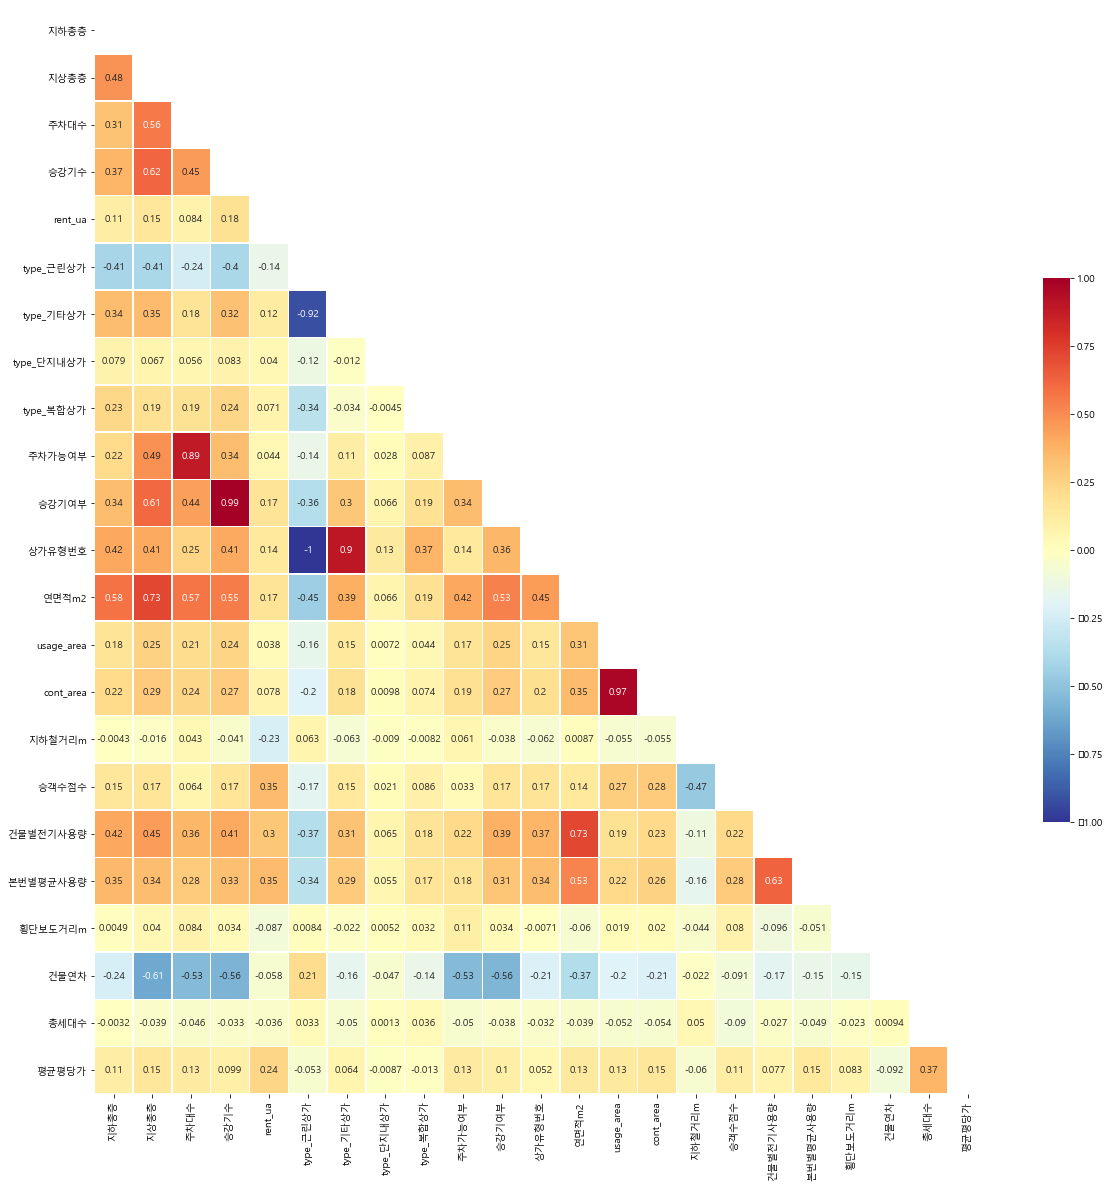

In [26]:
# 스피어만 상관계수 히트맵

mask = np.zeros_like(corr_ua_s, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots( figsize=(20,20) )

sns.heatmap(corr_ua_s,
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

## 주요컬럼 이상치 제거
상관계수가 0.15 이상이고 연속형인 변수의 이상치를 제거한다.
* 건축면적m2, 연면적m2, 높이m, 지하철거리m, 승객수점수, 건물별전기사용량, 본번별평균사용량, 평균평당가

In [27]:
z1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8748 entries, 2 to 9469
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지하총층        8748 non-null   int64  
 1   지상총층        8748 non-null   int64  
 2   주차대수        8748 non-null   int64  
 3   승강기수        8748 non-null   int64  
 4   rent_ua     8748 non-null   float64
 5   type_근린상가   8748 non-null   int64  
 6   type_기타상가   8748 non-null   int64  
 7   type_단지내상가  8748 non-null   int64  
 8   type_복합상가   8748 non-null   int64  
 9   주차가능여부      8748 non-null   int64  
 10  승강기여부       8748 non-null   int64  
 11  상가유형번호      8748 non-null   int64  
 12  연면적m2       8748 non-null   float64
 13  usage_area  8748 non-null   float64
 14  cont_area   8748 non-null   float64
 15  지하철거리m      8748 non-null   float64
 16  승객수점수       8748 non-null   float64
 17  건물별전기사용량    8748 non-null   int64  
 18  본번별평균사용량    8748 non-null   float64
 19  횡단보도거리m     8748 non-null  

In [28]:
# 승객수점수 이상값 제거

q1 = z1["승객수점수"].quantile(0.25)
q3 = z1["승객수점수"].quantile(0.75)
iqt = 1.5 * (q3 - q1)
z2 = z1.copy()
z2["승객수점수"][(z2["승객수점수"] > (q3 + iqt)) | (z2["승객수점수"] < (q1 - iqt))] = None

z2 = z2.dropna(axis = 0, how= 'any')
z2

<ipython-input-28-1eb64b94a9ab>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z2["승객수점수"][(z2["승객수점수"] > (q3 + iqt)) | (z2["승객수점수"] < (q1 - iqt))] = None


,지하총층,지상총층,주차대수,승강기수,rent_ua,type_근린상가,type_기타상가,type_단지내상가,type_복합상가,주차가능여부,...,usage_area,cont_area,지하철거리m,승객수점수,건물별전기사용량,본번별평균사용량,횡단보도거리m,건물연차,총세대수,평균평당가
2,5,6,4,2,4.323740,0,1,0,0,1,...,370.05,370.05,2.095677,41692.829,25836,15813.56,168.113254,7,436,2145.00
3,1,4,0,0,4.792551,1,0,0,0,0,...,73.03,73.03,3.944218,24836.371,329,2033.50,70.496126,31,436,2145.00
5,2,6,4,1,2.693714,0,1,0,0,1,...,604.37,695.77,1.545939,53349.692,23382,15813.56,100.760691,24,436,2145.00
6,1,6,0,0,3.608247,1,0,0,0,0,...,174.60,174.60,1.513924,108422.444,3603,15813.56,118.510267,29,436,2145.00
8,1,3,3,0,7.238095,1,0,0,0,1,...,26.25,26.25,5.148030,48431.394,4521,4521.00,24.350156,23,436,2145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9465,1,4,8,0,2.143385,1,0,0,0,1,...,135.30,150.00,6.338093,16626.646,3433,3433.00,30.926687,35,70,1410.80
9466,1,3,2,0,0.874221,1,0,0,0,1,...,91.51,100.51,6.663946,11408.498,744,668.67,173.587834,30,126,1435.67
9467,0,2,9,0,6.050130,1,0,0,0,1,...,231.40,330.58,3.604660,16101.477,8198,5994.50,35.182885,14,12,1891.00
9468,1,2,0,0,4.112554,1,0,0,0,0,...,23.10,26.40,3.943528,63850.478,5625,8424.50,102.889515,37,62,2134.00


In [29]:
# 연면적m2 이상값 제거

q1 = z2["연면적m2"].quantile(0.25)
q3 = z2["연면적m2"].quantile(0.75)
iqt = 1.5 * (q3 - q1)
z3 = z2.copy()
z3["연면적m2"][(z3["연면적m2"] > (q3 + iqt)) | (z3["연면적m2"] < (q1 - iqt))] = None

z3 = z3.dropna(axis = 0, how= 'any')
z3

<ipython-input-29-02f1bf94b154>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z3["연면적m2"][(z3["연면적m2"] > (q3 + iqt)) | (z3["연면적m2"] < (q1 - iqt))] = None


,지하총층,지상총층,주차대수,승강기수,rent_ua,type_근린상가,type_기타상가,type_단지내상가,type_복합상가,주차가능여부,...,usage_area,cont_area,지하철거리m,승객수점수,건물별전기사용량,본번별평균사용량,횡단보도거리m,건물연차,총세대수,평균평당가
3,1,4,0,0,4.792551,1,0,0,0,0,...,73.03,73.03,3.944218,24836.371,329,2033.50,70.496126,31,436,2145.00
6,1,6,0,0,3.608247,1,0,0,0,0,...,174.60,174.60,1.513924,108422.444,3603,15813.56,118.510267,29,436,2145.00
8,1,3,3,0,7.238095,1,0,0,0,1,...,26.25,26.25,5.148030,48431.394,4521,4521.00,24.350156,23,436,2145.00
9,2,6,0,0,4.500000,1,0,0,0,0,...,100.00,129.00,2.455896,37029.676,17634,15813.56,181.392333,29,436,2145.00
10,1,2,0,0,1.646337,1,0,0,0,0,...,267.26,267.26,1.532716,105170.166,3196,4673.00,106.699285,54,436,2145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9465,1,4,8,0,2.143385,1,0,0,0,1,...,135.30,150.00,6.338093,16626.646,3433,3433.00,30.926687,35,70,1410.80
9466,1,3,2,0,0.874221,1,0,0,0,1,...,91.51,100.51,6.663946,11408.498,744,668.67,173.587834,30,126,1435.67
9467,0,2,9,0,6.050130,1,0,0,0,1,...,231.40,330.58,3.604660,16101.477,8198,5994.50,35.182885,14,12,1891.00
9468,1,2,0,0,4.112554,1,0,0,0,0,...,23.10,26.40,3.943528,63850.478,5625,8424.50,102.889515,37,62,2134.00


In [30]:
# 지하철거리m 이상값 제거

q1 = z3["지하철거리m"].quantile(0.25)
q3 = z3["지하철거리m"].quantile(0.75)
iqt = 1.5 * (q3 - q1)
z4 = z3.copy()
z4["지하철거리m"][(z4["지하철거리m"] > (q3 + iqt)) | (z4["지하철거리m"] < (q1 - iqt))] = None

z4 = z4.dropna(axis = 0, how= 'any')
z4

<ipython-input-30-a88591830510>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z4["지하철거리m"][(z4["지하철거리m"] > (q3 + iqt)) | (z4["지하철거리m"] < (q1 - iqt))] = None


,지하총층,지상총층,주차대수,승강기수,rent_ua,type_근린상가,type_기타상가,type_단지내상가,type_복합상가,주차가능여부,...,usage_area,cont_area,지하철거리m,승객수점수,건물별전기사용량,본번별평균사용량,횡단보도거리m,건물연차,총세대수,평균평당가
3,1,4,0,0,4.792551,1,0,0,0,0,...,73.03,73.03,3.944218,24836.371,329,2033.50,70.496126,31,436,2145.00
6,1,6,0,0,3.608247,1,0,0,0,0,...,174.60,174.60,1.513924,108422.444,3603,15813.56,118.510267,29,436,2145.00
8,1,3,3,0,7.238095,1,0,0,0,1,...,26.25,26.25,5.148030,48431.394,4521,4521.00,24.350156,23,436,2145.00
9,2,6,0,0,4.500000,1,0,0,0,0,...,100.00,129.00,2.455896,37029.676,17634,15813.56,181.392333,29,436,2145.00
10,1,2,0,0,1.646337,1,0,0,0,0,...,267.26,267.26,1.532716,105170.166,3196,4673.00,106.699285,54,436,2145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9465,1,4,8,0,2.143385,1,0,0,0,1,...,135.30,150.00,6.338093,16626.646,3433,3433.00,30.926687,35,70,1410.80
9466,1,3,2,0,0.874221,1,0,0,0,1,...,91.51,100.51,6.663946,11408.498,744,668.67,173.587834,30,126,1435.67
9467,0,2,9,0,6.050130,1,0,0,0,1,...,231.40,330.58,3.604660,16101.477,8198,5994.50,35.182885,14,12,1891.00
9468,1,2,0,0,4.112554,1,0,0,0,0,...,23.10,26.40,3.943528,63850.478,5625,8424.50,102.889515,37,62,2134.00


In [31]:
# 건물별전기사용량 이상값 제거

q1 = z4["건물별전기사용량"].quantile(0.25)
q3 = z4["건물별전기사용량"].quantile(0.75)
iqt = 1.5 * (q3 - q1)
z5 = z4.copy()
z5["건물별전기사용량"][(z5["건물별전기사용량"] > (q3 + iqt)) | (z5["건물별전기사용량"] < (q1 - iqt))] = None

z5 = z5.dropna(axis = 0, how= 'any')
z5

<ipython-input-31-072aa1f9912a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z5["건물별전기사용량"][(z5["건물별전기사용량"] > (q3 + iqt)) | (z5["건물별전기사용량"] < (q1 - iqt))] = None


,지하총층,지상총층,주차대수,승강기수,rent_ua,type_근린상가,type_기타상가,type_단지내상가,type_복합상가,주차가능여부,...,usage_area,cont_area,지하철거리m,승객수점수,건물별전기사용량,본번별평균사용량,횡단보도거리m,건물연차,총세대수,평균평당가
3,1,4,0,0,4.792551,1,0,0,0,0,...,73.03,73.03,3.944218,24836.371,329.0,2033.50,70.496126,31,436,2145.00
6,1,6,0,0,3.608247,1,0,0,0,0,...,174.60,174.60,1.513924,108422.444,3603.0,15813.56,118.510267,29,436,2145.00
8,1,3,3,0,7.238095,1,0,0,0,1,...,26.25,26.25,5.148030,48431.394,4521.0,4521.00,24.350156,23,436,2145.00
10,1,2,0,0,1.646337,1,0,0,0,0,...,267.26,267.26,1.532716,105170.166,3196.0,4673.00,106.699285,54,436,2145.00
11,2,5,0,0,2.810057,1,0,0,0,0,...,946.60,946.60,3.127912,62401.268,475.0,15813.56,107.281212,30,436,2145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9465,1,4,8,0,2.143385,1,0,0,0,1,...,135.30,150.00,6.338093,16626.646,3433.0,3433.00,30.926687,35,70,1410.80
9466,1,3,2,0,0.874221,1,0,0,0,1,...,91.51,100.51,6.663946,11408.498,744.0,668.67,173.587834,30,126,1435.67
9467,0,2,9,0,6.050130,1,0,0,0,1,...,231.40,330.58,3.604660,16101.477,8198.0,5994.50,35.182885,14,12,1891.00
9468,1,2,0,0,4.112554,1,0,0,0,0,...,23.10,26.40,3.943528,63850.478,5625.0,8424.50,102.889515,37,62,2134.00


In [32]:
# 본번별평균사용량 이상값 제거

q1 = z5["본번별평균사용량"].quantile(0.25)
q3 = z5["본번별평균사용량"].quantile(0.75)
iqt = 1.5 * (q3 - q1)
z6 = z5.copy()
z6["본번별평균사용량"][(z6["본번별평균사용량"] > (q3 + iqt)) | (z6["본번별평균사용량"] < (q1 - iqt))] = None

z6 = z6.dropna(axis = 0, how= 'any')
z6

<ipython-input-32-f294d06d6038>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z6["본번별평균사용량"][(z6["본번별평균사용량"] > (q3 + iqt)) | (z6["본번별평균사용량"] < (q1 - iqt))] = None


,지하총층,지상총층,주차대수,승강기수,rent_ua,type_근린상가,type_기타상가,type_단지내상가,type_복합상가,주차가능여부,...,usage_area,cont_area,지하철거리m,승객수점수,건물별전기사용량,본번별평균사용량,횡단보도거리m,건물연차,총세대수,평균평당가
3,1,4,0,0,4.792551,1,0,0,0,0,...,73.03,73.03,3.944218,24836.371,329.0,2033.50,70.496126,31,436,2145.00
6,1,6,0,0,3.608247,1,0,0,0,0,...,174.60,174.60,1.513924,108422.444,3603.0,15813.56,118.510267,29,436,2145.00
8,1,3,3,0,7.238095,1,0,0,0,1,...,26.25,26.25,5.148030,48431.394,4521.0,4521.00,24.350156,23,436,2145.00
10,1,2,0,0,1.646337,1,0,0,0,0,...,267.26,267.26,1.532716,105170.166,3196.0,4673.00,106.699285,54,436,2145.00
11,2,5,0,0,2.810057,1,0,0,0,0,...,946.60,946.60,3.127912,62401.268,475.0,15813.56,107.281212,30,436,2145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9465,1,4,8,0,2.143385,1,0,0,0,1,...,135.30,150.00,6.338093,16626.646,3433.0,3433.00,30.926687,35,70,1410.80
9466,1,3,2,0,0.874221,1,0,0,0,1,...,91.51,100.51,6.663946,11408.498,744.0,668.67,173.587834,30,126,1435.67
9467,0,2,9,0,6.050130,1,0,0,0,1,...,231.40,330.58,3.604660,16101.477,8198.0,5994.50,35.182885,14,12,1891.00
9468,1,2,0,0,4.112554,1,0,0,0,0,...,23.10,26.40,3.943528,63850.478,5625.0,8424.50,102.889515,37,62,2134.00


In [33]:
# 평균평당가 이상값 제거

q1 = z6["평균평당가"].quantile(0.25)
q3 = z6["평균평당가"].quantile(0.75)
iqt = 1.5 * (q3 - q1)
z7 = z6.copy()
z7["평균평당가"][(z7["평균평당가"] > (q3 + iqt)) | (z7["평균평당가"] < (q1 - iqt))] = None

z7 = z7.dropna(axis = 0, how= 'any')
z7

<ipython-input-33-7bf05e32e7a0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z7["평균평당가"][(z7["평균평당가"] > (q3 + iqt)) | (z7["평균평당가"] < (q1 - iqt))] = None


,지하총층,지상총층,주차대수,승강기수,rent_ua,type_근린상가,type_기타상가,type_단지내상가,type_복합상가,주차가능여부,...,usage_area,cont_area,지하철거리m,승객수점수,건물별전기사용량,본번별평균사용량,횡단보도거리m,건물연차,총세대수,평균평당가
3,1,4,0,0,4.792551,1,0,0,0,0,...,73.03,73.03,3.944218,24836.371,329.0,2033.50,70.496126,31,436,2145.00
6,1,6,0,0,3.608247,1,0,0,0,0,...,174.60,174.60,1.513924,108422.444,3603.0,15813.56,118.510267,29,436,2145.00
8,1,3,3,0,7.238095,1,0,0,0,1,...,26.25,26.25,5.148030,48431.394,4521.0,4521.00,24.350156,23,436,2145.00
10,1,2,0,0,1.646337,1,0,0,0,0,...,267.26,267.26,1.532716,105170.166,3196.0,4673.00,106.699285,54,436,2145.00
11,2,5,0,0,2.810057,1,0,0,0,0,...,946.60,946.60,3.127912,62401.268,475.0,15813.56,107.281212,30,436,2145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9465,1,4,8,0,2.143385,1,0,0,0,1,...,135.30,150.00,6.338093,16626.646,3433.0,3433.00,30.926687,35,70,1410.80
9466,1,3,2,0,0.874221,1,0,0,0,1,...,91.51,100.51,6.663946,11408.498,744.0,668.67,173.587834,30,126,1435.67
9467,0,2,9,0,6.050130,1,0,0,0,1,...,231.40,330.58,3.604660,16101.477,8198.0,5994.50,35.182885,14,12,1891.00
9468,1,2,0,0,4.112554,1,0,0,0,0,...,23.10,26.40,3.943528,63850.478,5625.0,8424.50,102.889515,37,62,2134.00


## 회귀분석

In [34]:
# 회귀분석

from statsmodels.formula.api import ols

# 모형 만들기 (전체 변수를 넣어보자)

model3 = ols('rent_ua ~ usage_area + cont_area + 지하총층 + 지상총층 + 연면적m2 + 주차대수 + 승강기수 + 지하철거리m + 승객수점수 + 횡단보도거리m + 건물별전기사용량 + 본번별평균사용량 + 건물연차 + 총세대수 + 평균평당가', z7)

# 모형 적합

res = model3.fit()

# 분석 결과 확인

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                rent_ua   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     94.68
Date:                Wed, 14 Oct 2020   Prob (F-statistic):          1.35e-262
Time:                        09:27:23   Log-Likelihood:                -10805.
No. Observations:                5957   AIC:                         2.164e+04
Df Residuals:                    5941   BIC:                         2.175e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5859      0.143     18.109      0.000       2.306       2.866
usage_area    -0.0001   4.11e-05     -2.770      0.006      -0.000   -3.33e-05
cont_area   1.628e-06   2.41e-06      0.674      0.500   -3.11e-06    6.36e-06
지하총층          -0.1813      0.051     -3.530      0.000      -0.282      -0.081
지상총층           0.0327      0.021      1.533      0.125      -0.009       0.075
연면적m2         -0.0006   8.13e-05     -6.909      0.000      -0.001      -0.000
주차대수          -0.0013      0.008     -0.156      0.876      -0.017       0.015
승강기수           0.2071      0.068      3.053      0.002       0.074       0.340
지하철거리m        -0.0470      0.010     -4.849      0.000      -0.066      -0.028
승객수점수       1.013e-05   6.55e-07     15.464      0.000    8.85e-06    1.14e-05
횡단보도거리m       -0.0035      0.000     -8.023      0.000      -0.004      -0.003
건물별전기사용량    7.904e-05   6.95e-06     11.370      0.000    6.54e-05    9.27e-05
본번별평균사용량     5.77e-05   6.25e-06      9.231      0.000    4.54e-05    6.99e-05
건물연차           0.0038      0.002      1.809      0.070      -0.000       0.008
총세대수          -0.0004    4.8e-05     -7.920      0.000      -0.000      -0.000
평균평당가          0.0004   2.15e-05     17.429      0.000       0.000       0.000
==============================================================================
Omnibus:                      585.185   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              777.063
Skew:                           0.826   Prob(JB):                    1.83e-169
Kurtosis:                       3.635   Cond. No.                     4.33e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 다중공선성 파악
다중공선성은 분산팽창계수(VIF, Variance Inflation Factor)를 구하여 판단한다. 엄밀한 기준은 없으나 일반적으로 10보다 크면 다중공선성이 있다고 판단. (5를 기준으로 하기도 한다.)

In [35]:
# 다중공선성 확인을 위한 모듈

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [36]:
# model3(모든 연속형 변수들의 이상값 제거 후 모든 변수를 넣은 모형)의 독립변수 확인

model3.exog_names

['Intercept',
 'usage_area',
 'cont_area',
 '지하총층',
 '지상총층',
 '연면적m2',
 '주차대수',
 '승강기수',
 '지하철거리m',
 '승객수점수',
 '횡단보도거리m',
 '건물별전기사용량',
 '본번별평균사용량',
 '건물연차',
 '총세대수',
 '평균평당가']

In [37]:
# 한번에 모든 컬럼의 VIF를 계산

pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model3.exog, i)} 
             for i, column in enumerate(model3.exog_names)
             if column != 'Intercept')  # 절편의 VIF는 구하지 않는다.

,컬럼,VIF
0,usage_area,1.146868
1,cont_area,1.006643
2,지하총층,1.266624
3,지상총층,2.462330
4,연면적m2,3.234590
5,주차대수,1.732011
6,승강기수,1.606173
7,지하철거리m,1.191687
8,승객수점수,1.266995
9,횡단보도거리m,1.050644


C:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\python\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


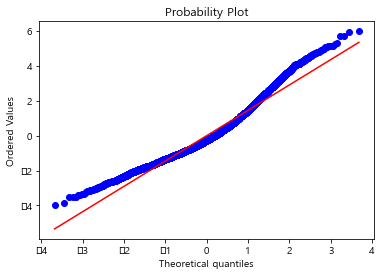

In [38]:
# 잔차의 정규성 확인

import pandas as pd
import statsmodels.formula.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# 조금 다른 방법으로 회귀분석 수행

res2 = sm.ols(formula='rent_ua ~ usage_area + cont_area + 지하총층 + 지상총층 + 연면적m2 + 주차대수 + 승강기수 + 지하철거리m + 승객수점수 + 횡단보도거리m + 건물별전기사용량 + 본번별평균사용량 + 건물연차 + 총세대수 + 평균평당가', data = z7)

# 회귀분석 결과에서 잔차만 추출

resid = res2.fit().resid

# Q-Q Plot을 그려서 정규성 확인

from scipy.stats import probplot

plt.figure()
probplot(resid, plot=plt)
plt.show()